# evaluate

> Evaluate our predictions

In [1]:
#| default_exp evaluate

In [2]:
#| export
from pathlib import Path
from sklearn import metrics
import numpy as np
import pandas as pd

In [3]:
data_dir = Path("../data")
assert data_dir.exists()
tejas_dir = data_dir / 'tejas'

In [4]:
# predictions_10k_path = data_dir / 'predictions_2k.csv'
# assert predictions_10k_path.exists()

# predictions_10k = pd.read_csv(predictions_10k_path)
# predictions_10k.loc[:, 'pred'] = predictions_10k.pred.str.strip()
# predictions_10k.loc[:, 'label'] = predictions_10k.label.str.strip()
# predictions_10k.head()

In [5]:
# performance_10k_kwargs = {
#     'y_true': predictions_10k.label,
#     'y_pred': predictions_10k.pred
# }

In [33]:
sample_predictions_path = tejas_dir / 'sample_predictions.csv'
assert sample_predictions_path.exists()

predictions = pd.read_csv(sample_predictions_path)
predictions.loc[:, 'prediction'] = predictions.prediction.str.strip()
predictions.loc[:, 'label'] = predictions.label.str.strip()
predictions.loc[:, 'prompt'] = predictions.prompt.str.strip()
predictions.head()

,prediction,label,idx,prompt,email
0,Returns,Returns,13614,Our customer service team wants to classify em...,-- SUBJECT --\nNeed signature AC account\n-- B...
1,Billing / Invoice,Account/Inquiry,36424,Our customer service team wants to classify em...,-- SUBJECT --\nAuto-Reply. We Have Received Y...
2,Credits,Credits,45649,Our customer service team wants to classify em...,-- SUBJECT --\nFw: 5378044 - Cardinal Health -...
3,Account/Inquiry,Account/Inquiry,49005,Our customer service team wants to classify em...,-- SUBJECT --\nPaid - Invoice 7334606027 - to ...
4,Account/Inquiry,Order Processing,5134,Our customer service team wants to classify em...,-- SUBJECT --\nReceived Fax From: 4357273000\n...


In [34]:
errors = predictions[predictions.prediction != predictions.label]
predictions.shape[0], errors.shape[0]

(600, 188)

In [45]:
#| export
def display_evaluation_row(idx: int, row: pd.Series) -> None:
    print("| -- IDX --|\n", idx)
    print("| -- RAW EMAIL -- |\n", row.email)
    print("| -- LABEL -- |\n", row.label)
    print("| -- PROMPT -- |\n", row.prompt)
    print("| -- PREDICTION -- |\n", row.prediction)
    print()

In [48]:
for idx, row in errors.sample(20, random_state=42).iterrows():
    display_evaluation_row(idx, row)

| -- IDX --|
 586
| -- RAW EMAIL -- |
 -- SUBJECT --
FW: Invoice# 7334929447 & 7334929448
-- BODY --
Hello Ben, I am looping in @Pharma-CustomerService<mailto:Pharma-CustomerService@cardinalhealth.com> to assist you. As a friendly reminder please always remember to include your account number when reaching out.  Hello Team, Please see below for account 2052048354 your assistance with working the customer and DC is greatly appreciated.   Thank you,     [cid:image002.png@01DA0CD3.E6EC2780]  Carmelita Rankin Consultant, Account Management-Alt Care National Markets 7000 Cardinal Place, Dublin, OH 43017 614.757.4497 dir | 614.652.8502 fax carmelita.rankin@cardinalhealth.com<mailto:carmelita.rankin@cardinalhealth.com>  7AM-3PM EST.     [cid:image003.png@01DA0CD3.E6EC2780] ***Cardinal Customer Service (800) 926.3161 Hours 7:00 am â€“ 11:00 pm EST Monday â€“ Friday ***Customer Service Email  Pharma-CustomerService@cardinalhealth.com<mailto:Pharma-CustomerService@cardinalhealth.com> ***Customer

In [17]:
predictions.pred.value_counts()

pred
Order Processing        194
Account/Inquiry         120
Billing / Invoice        69
Order Discrepancy        68
Returns                  44
Product Inquiry          39
Delivery                 33
Credits                  14
General Inquiry           7
Pricing                   5
Program / Promotions      5
Contracts                 1
Fax Transmission          1
Name: count, dtype: int64

In [16]:
predictions.label.value_counts()

label
Order Processing        224
Account/Inquiry         164
Order Discrepancy        54
Returns                  51
Product Inquiry          33
Billing / Invoice        31
Delivery                 16
Credits                  12
General Inquiry           9
Program / Promotions      3
Pricing                   3
Name: count, dtype: int64

In [7]:
performance_kwargs = {
    'y_true': predictions.label,
    'y_pred': predictions.pred
}

Accuracy

In [8]:
metrics.accuracy_score(
    **performance_kwargs
)

0.6866666666666666

In [9]:
# metrics.accuracy_score(
#     **performance_10k_kwargs
# )

Classification report

In [10]:
performance_report_str = metrics.classification_report(
    zero_division=np.nan,
    output_dict=False,
    **performance_kwargs)
print(performance_report_str)

                      precision    recall  f1-score   support

     Account/Inquiry       0.92      0.67      0.77       164
   Billing / Invoice       0.35      0.77      0.48        31
           Contracts       0.00       nan       nan         0
             Credits       0.29      0.33      0.31        12
            Delivery       0.33      0.69      0.45        16
    Fax Transmission       0.00       nan       nan         0
     General Inquiry       0.14      0.11      0.12         9
   Order Discrepancy       0.65      0.81      0.72        54
    Order Processing       0.88      0.76      0.82       224
             Pricing       0.40      0.67      0.50         3
     Product Inquiry       0.44      0.52      0.47        33
Program / Promotions       0.00      0.00       nan         3
             Returns       0.64      0.55      0.59        51

            accuracy                           0.69       600
           macro avg       0.39      0.54      0.52       600
      

In [11]:
# performance_10k_report_str = metrics.classification_report(
#     zero_division=np.nan,
#     output_dict=False,
#     **performance_10k_kwargs)
# print(performance_10k_report_str)

Confusion Matrix

In [12]:
# matrix = metrics.confusion_matrix(
#     **performance_10k_kwargs
# )
# matrix.diagonal()/matrix.sum(axis=1)

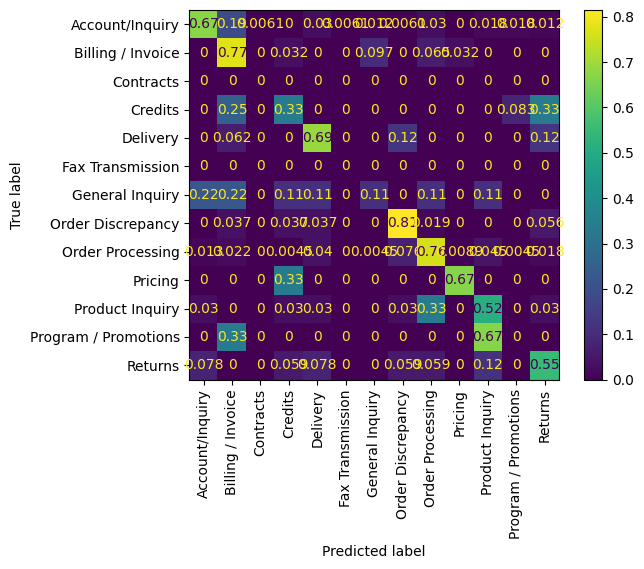

In [13]:
matrix_display = metrics.ConfusionMatrixDisplay.from_predictions(
    normalize='true',
    xticks_rotation='vertical',
    **performance_kwargs
)

In [14]:
# matrix_10k_display = metrics.ConfusionMatrixDisplay.from_predictions(
#     normalize='true',
#     xticks_rotation='vertical',
#     **performance_10k_kwargs
# )

## Export

In [49]:
#| hide
import nbdev; nbdev.nbdev_export()